# Часть I: О теореме Байеса

## 1

```Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.```

Прокурор ошибается в обоих утверждениях

1% - это шанс что случаный человек имеет такую группу крови и 99% что не имеет. 

Прокурор должен был оценить вероятность того, что обвиняемый убийца.

## 2

```Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?
```

Адвокат утверждает что подсудимый совершил убийство с вероятностью 0.01%, но 0.01% - это вероятность того что случайный человек с редкой группа крови живущий в городе - убийца.

Проблема в том что подсудимый скорее всего не является случайным человеком, и у следствия есть некие сведения о связи подозреваемого и жертвы. Предположим что у жертвы было 200 знакомых, и 1 из них убийца, т.е. вероятность того что случайный знакомый жертвы убийца = 0.5%, теперь оценим насколько совпадение редкой группы крови повышает шансы подозреваемого

УЗ - убийца знакомый
РГК - редкая группа крови

**P(УЗ|РГК) = P(РГК|УЗ) * P(УЗ) / P(РГК)** - вероятность того что один из знакомых убийца при условии того что у него редкая группа крови

P(РГК|УЗ) - вероятность того что убийца - это знакомый с редкой группой крови = 1
P(УЗ) - вероятность того что один из знакомых убийца = 1/200 = 0.005 
P(РГК) - вероятность того что у случайного знакомого редкая группа крови = 0.01

**1 * 0.005 / 0.01 = 0.5**

## 3

In [148]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from sklearn.linear_model import LinearRegression

In [2]:
def pdt(fnr, fpr, pd):
    tnr = 1 - fnr
    tpr = 1 - fpr
    pnd = 1 - pd
    
    return (tpr * pd) / (tpr * pd + fpr * pnd)

pdt(0.05, 0.05, 0.01)

0.16101694915254236

In [23]:
negatives = np.linspace(0, 0.05, 100)

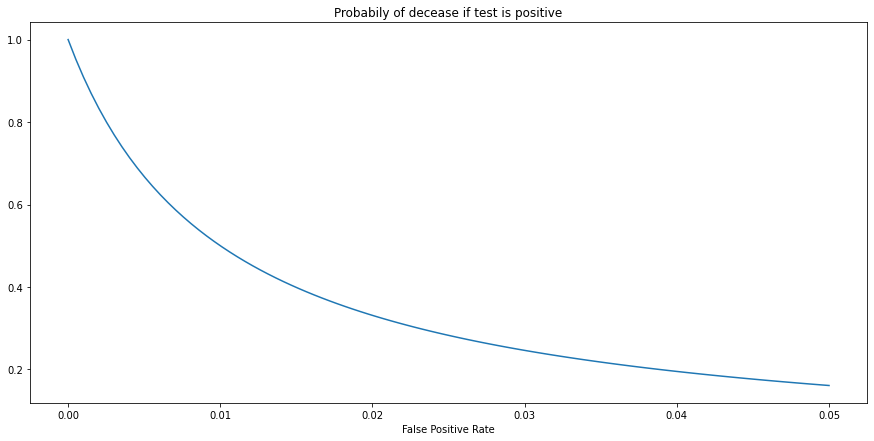

In [111]:
positive_desease_by_fpr = pdt(fnr=0.05, fpr=negatives, pd=0.01)
plt.figure(figsize=(15, 7)) 
plt.plot(negatives, positive_desease_by_fpr)
plt.title("Probabily of decease if test is positive")
plt.xlabel("False Positive Rate")
plt.show()

In [31]:
def pdnt(fnr, fpr, pd):
    tnr = 1 - fnr
    tpr = 1 - fpr
    pnd = 1 - pd
    
    return (fnr * pd) / (fnr * pd + tnr * pnd)

pdnt(0.05, 0.05, 0.01)

0.0005313496280552604

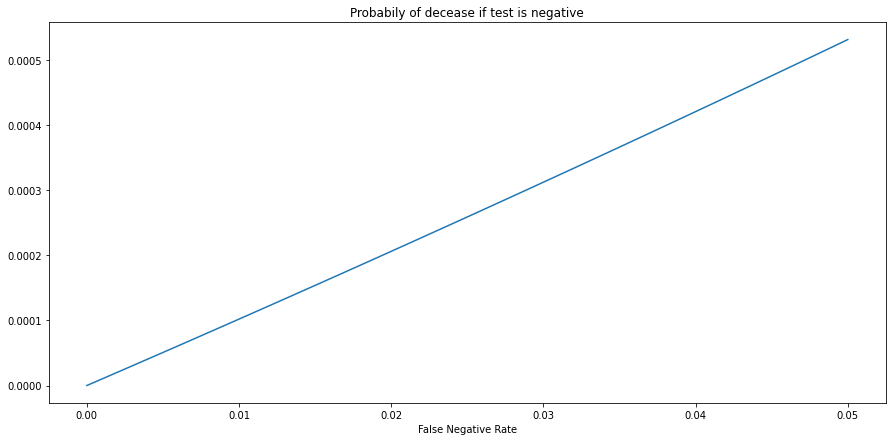

In [110]:
positive_desease_by_fnr = pdnt(fnr=negatives, fpr=0.05, pd=0.01)
plt.figure(figsize=(15, 7)) 
plt.plot(negatives, positive_desease_by_fnr)
plt.title("Probabily of decease if test is negative")
plt.xlabel("False Negative Rate")
plt.show()

Уменьшение **False Positive Rate** даст значительный прирост точности в определении заболевших.

# Часть II: О линейной регрессии

## 1

In [121]:
df = pd.read_csv("owid-covid-data.csv", parse_dates=["date"])
df = df[(df.iso_code == "RUS") & (df.date >= np.datetime64(datetime.date(2020, 3, 3)))].sort_values("date")
df.new_cases = df.new_cases.replace(0, 1)
df["day_number"] = range(0, 350)

df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,day_number
51186,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,NaN,0.000,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,0
51187,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,0.000,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,1
51188,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.000,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,2
51189,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.000,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,3
51190,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,0.000,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51531,RUS,Europe,Russia,2021-02-11,3983031.0,14803.0,15457.286,77415.0,542.0,487.143,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,345
51532,RUS,Europe,Russia,2021-02-12,3997898.0,14867.0,15232.000,77911.0,496.0,484.429,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,346
51533,RUS,Europe,Russia,2021-02-13,4012538.0,14640.0,14983.571,78403.0,492.0,484.714,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,347
51534,RUS,Europe,Russia,2021-02-14,4026506.0,13968.0,14720.714,78825.0,422.0,485.000,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,348


In [123]:
train = df[0:50]
test = df[50:]

## 2

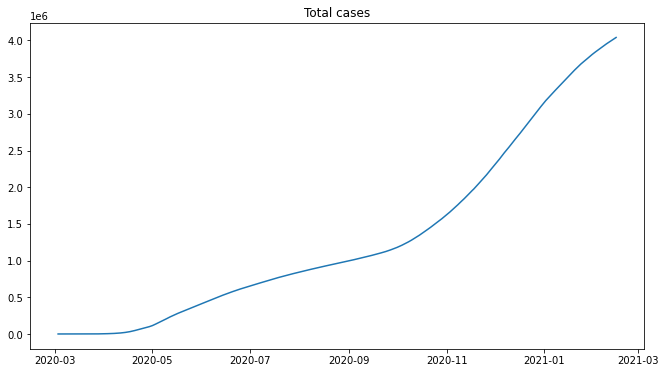

In [117]:
plt.figure(figsize=(11, 6)) 
plt.plot(df.date, df.total_cases)
plt.title("Total cases")
plt.show()

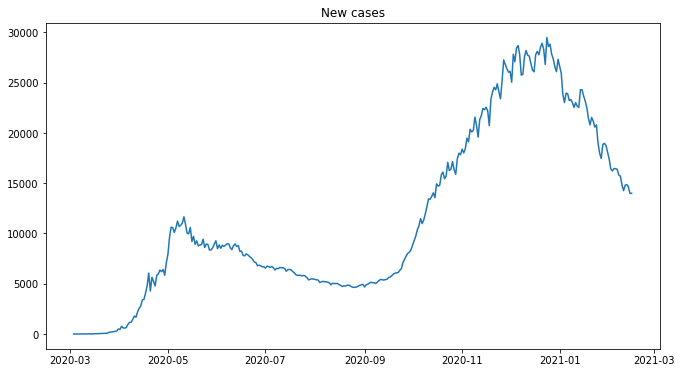

In [116]:
plt.figure(figsize=(11, 6)) 
plt.plot(df.date, df.new_cases)
plt.title("New cases")
plt.show()

### a

In [124]:
exp_model = LinearRegression()
exp_model.fit(train[["day_number"]], np.log(train["total_cases"]))

LinearRegression()

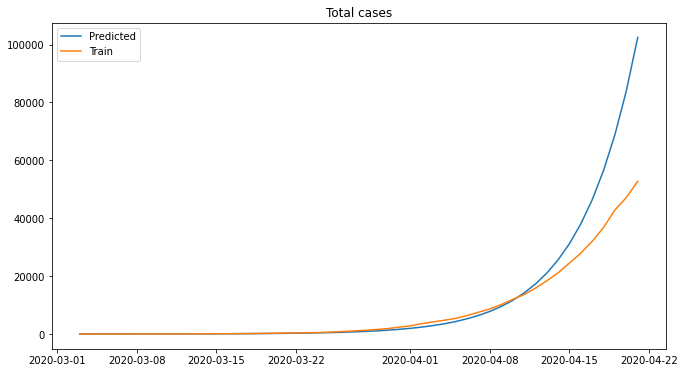

In [147]:
predicted = np.exp(exp_model.predict(train[["day_number"]]))
plt.figure(figsize=(11, 6)) 
plt.plot(train.date, predicted, label="Predicted")
plt.plot(train.date, train.total_cases, label="Train")
plt.title("Total cases")
plt.legend()
plt.show()

In [133]:
exp_model.coef_, exp_model.intercept_

(array([0.19829091]), 1.820737148784695)

[1.820737148784695, 0.19829091233588567]

### b

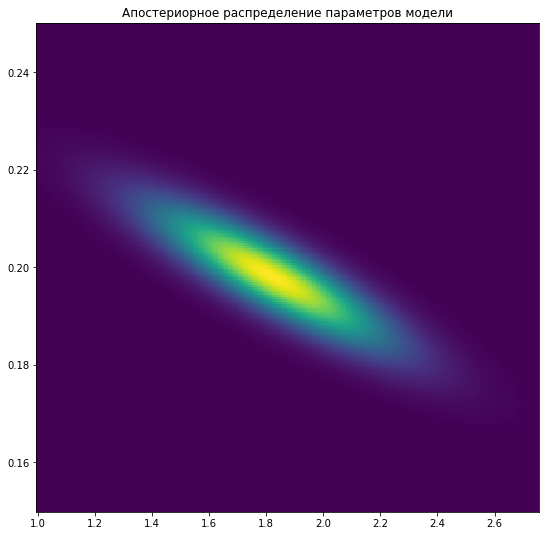

In [231]:
count = 200
x = np.linspace(1, 2.75, count)
y = np.linspace(0.15, 0.25, count)
xv, yv = np.meshgrid(x, y)
points = np.c_[xv[..., None], yv[..., None]]

mean = [exp_model.intercept_, exp_model.coef_[0]]

x = train["day_number"]
x2 = x ** 2
cov = np.linalg.inv(np.array([len(x), np.sum(x), np.sum(x), np.sum(x2)]).reshape(2, 2))

z = multivariate_normal.pdf(points, mean=mean, cov=cov)

plt.figure(figsize=(9, 9))
plt.pcolormesh(xv, yv, z, shading="auto")
plt.title("Апостериорное распределение параметров модели")
plt.show()

### c

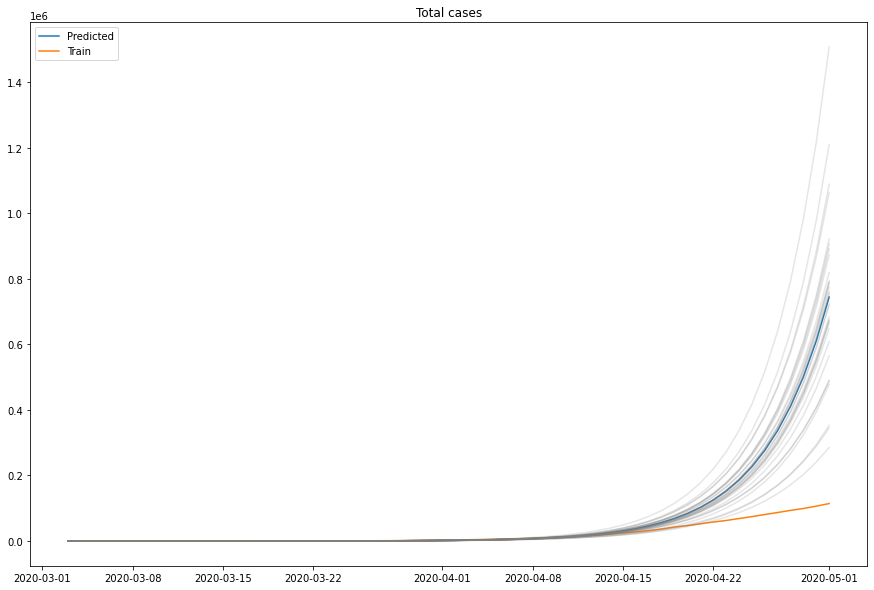

In [245]:
def sample_weights(n_samples=None):
    return multivariate_normal.rvs(mean, cov, size=n_samples)

def predict_sample(x, n_samples=None):
    x = np.c_[np.ones((len(x), 1)), x]
    
    if n_samples:
        return x.dot(sample_weights(n_samples).T)
    else:
        return x.dot(sample_weights())

subset = df[0:60]

plt.figure(figsize=(15, 10)) 
plt.plot(subset.date, np.exp(exp_model.predict(subset[["day_number"]])), label="Predicted")
plt.plot(subset.date, subset.total_cases, label="Train")

for i in range(30):
    plt.plot(
        subset.date,
        np.exp(predict_sample(subset["day_number"])),
        alpha=0.2,
        color='gray'
    )
    
plt.title("Total cases")
plt.legend()
plt.show()

In [261]:
key_dates = df[(df.date == "2020-05-01") | (df.date == "2020-06-01") | (df.date == "2020-09-01")][["day_number", "date"]]
key_dates

,day_number,date
51245,59,2020-05-01
51276,90,2020-06-01
51368,182,2020-09-01


'Total sampled cases on 2020-05-01 00:00:00 is 743706.0'

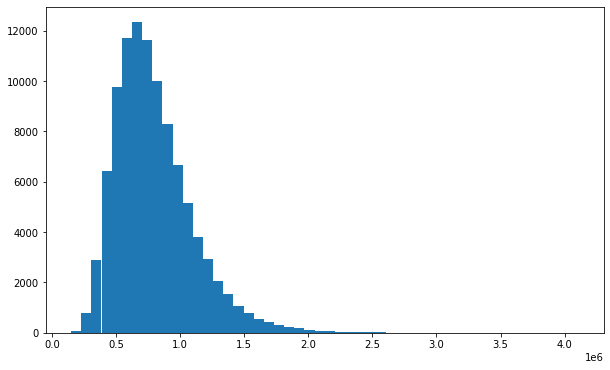

'Total sampled cases on 2020-06-01 00:00:00 is 347709432.0'

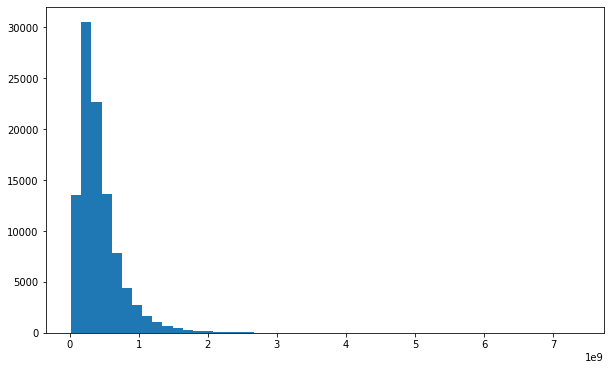

'Total sampled cases on 2020-09-01 00:00:00 is 2.8952962649644452e+16'

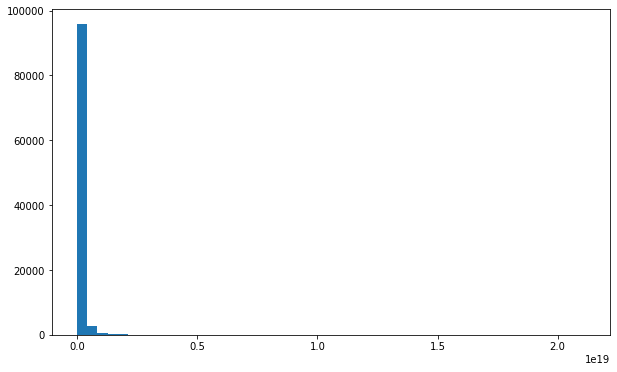

In [273]:
def sample_for_day(row):
    sampled_preds = np.exp(predict_sample(np.array([[row["day_number"]]]), n_samples=100000).flatten())

    display(f"Total sampled cases on {row['date']} is {np.median(sampled_preds).round()}")
    plt.figure(figsize=(10, 6)) 
    plt.hist(sampled_preds, bins=50)
    plt.show()    
    
for _, row in key_dates.iterrows():
    sample_for_day(row)